<p>
<img src="https://drive.google.com/uc?export=view&id=11V3n1rpH6yrleTIJcS5Y01QblGW7DiZ4" style="float: center"/>
</p>

<!-- <p>
<img src="Vib1-Experimental_b.svg" style="float: center"/>
</p>
-->

# Introdução do Python

> Marcus Vinicius Girão de Morais $\,\,$ *mvmorais@unb.br*

> ### <i class="fa fa-graduation-cap" aria-hidden="true"></i> Lesson highlights  
> - #### Série de Fourier: Teoria
> - #### Exemplo - Onda Quadrada.
> - #### Implementação Simples.

# 1. Série de Fourier

O movimento periódico descreve o comportamento de muitos sistemas vibratórios.

O movimento periódico é descrito por $u(t) = u(t+T)$, por definição.

Felizmente, qualquer função periódica de tempo infinito pode ser representada por uma **série de Fourier** como uma soma infinita de termos em seno e co-seno.
$$ u(t) = \frac{1}{2} a_o +
    \sum_{p=1}^{\infty} \left[ a_p \cos \left( p \Omega_o t \right) +  b_p \sin \left( p \Omega_o t \right) \right]$$

onde, a frequência fundamental $\Omega_o = 2\pi / T$, e $T$ é o periodo fundamento, e os coeficientes $a_o$, $a_i$ e $b_i (i =[1:\infty]$ são os coeficientes de Fourier, determinados por:

$$ a_p = \frac{2}{T} \int_0^T f(t) \cos(p \Omega_o t) dt, \quad p = 0,1,2,\ldots$$
e,
$$ b_p = \frac{2}{T} \int_0^T f(t) \sin(p \Omega_o t) dt, \quad p = 1,2,\ldots$$

# 2. Exemplo 1 - Onda Quadrada

Seja uma onda quadrada, figura abaixo, determine os seguintes itens:
- Determinar os coeficientes $a_p$ e $b_p$;
- Programe a função quadrada

<p>
<img src="https://drive.google.com/uc?export=view&id=1KQjAkJ8fIqOQAOiSOqf1zpy6BUni-0f1" style="float: center"/>
</p>



## 2.1 Determine os Coeficientes de Fourier

O coeficiente $a_p$ é dado por:

$$ a_p = \frac{2A}{T} \int_0^{0.5T}   \cos \left(2\pi p \frac{t}{T} \right) dt
- \frac{2A}{T} \int_{0.5T}^{T} \cos \left(2\pi p \frac{t}{T} \right) dt , \quad p = 0,1,2,\ldots$$
então,

$$ a_p = \frac{A}{\pi p} \left[ \left[ \sin (\pi p) - \sin 0 \right] - \left[ \sin (2\pi p) - \sin (\pi p) \right] \right] = 0 $$

O coeficiente $b_p$ é dado por:

$$ b_p = \frac{2A}{T} \int_0^{0.5T}   \sin \left(2\pi p \frac{t}{T} \right) dt
       - \frac{2A}{T} \int_{0.5T}^{T} \sin \left(2\pi p \frac{t}{T} \right) dt , \quad p = 1,2,\ldots$$

então,

$$ b_p = - \frac{A}{\pi p} \left[ \left[ \cos (\pi p) - \cos 0 \right] + \left[ \cos (2\pi p) - \cos (\pi p) \right] \right]
= \left\{ \begin{array}{ll}
      0, & seja ~ p ~ par  \\
    {4A}/(\pi p), & seja ~ p ~ impar\\
  \end{array} \right.
$$

Desta forma, a serie de Fourier de uma função quadrada é dada por:

$$ u(t) = \sum_{p=1}^{\infty} \left[ \frac{4A}{\pi p} \sin \left( p \Omega_o t \right) \right], \quad p = 1,3,5, \ldots$$

ou seja,

$$ u(t) = \frac{4A}{\pi} \left[ \sin \left(1 \Omega_o t \right) +
                                  \frac{1}{3} \sin \left(3 \Omega_o t \right) +
                                  \frac{1}{5} \sin \left(5 \Omega_o t \right) + \ldots \right]
                                  $$
onde, $\Omega_o = 2\pi/T$


## 2.2 Naive-Implementação da Onda Quadrada p/Fourier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# defina parametros inicial
A = 1.0
dt = 0.001
T  = 1.0

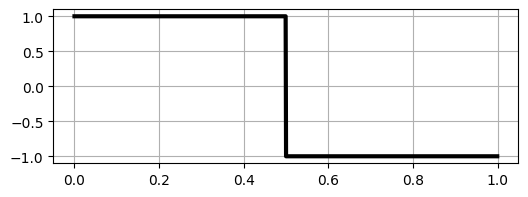

In [ ]:
# defina função quadrada
t = np.arange(0,T,dt)
n = len(t)
nhalf = int(np.floor(n/2))

u = np.zeros_like(t)
u[0:nhalf]       = (+1.0)*A
u[nhalf:2*nhalf] = (-1.0)*A

#fig, ax = plt.subplots()
#ax.plot(t, u, '-', color='k', linewidth=3)
plt.figure(figsize = (6,2))
plt.plot(t, u, '-', color='k', linewidth=3)
plt.grid()
plt.show()

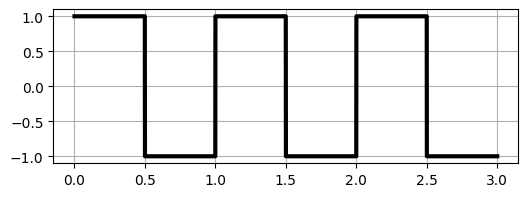

In [ ]:
#
t1 = np.concatenate((t, T+t, 2*T+t), axis=None)
u1 = np.concatenate((u, u, u),       axis=None)

#fig, ax1 = plt.subplots()
#ax1.plot(t1, u1, '-', color='k', linewidth=3)
plt.figure(figsize = (6,2))
plt.plot(t1, u1, '-', color='k', linewidth=3)
plt.grid()
plt.show()

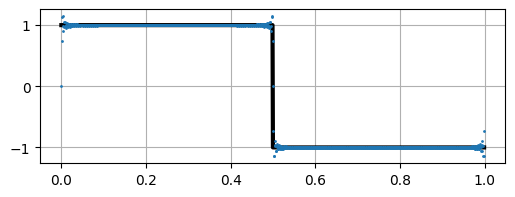

In [ ]:
#fig, ax = plt.subplots()
#ax.plot(t, u, '-', color='k', linewidth=3)
plt.figure(figsize = (6,2))
plt.plot(t, u, '-', color='k', linewidth=3)

# calcule serie de fourier
nmode = 100
uFS = 0.0

B = np.zeros(nmode)
for p in range(nmode):
    B[p] = (4*A/(np.pi*(2*p+1)))
    uFS  = uFS + B[p]*np.sin((2*p+1)*2*np.pi*t/T)
#    u1FS = np.concatenate((uFS, uFS, uFS),       axis=None)
#    ax.plot(t,uFS,'.', markersize=1)

#display(B)

#ax.figsize = (2,6)
#ax.plot(t,uFS,'.-', markersize=2)
plt.plot(t, uFS, '.', markersize=2)
plt.grid()
plt.show()

## 2.3 Onda Quadrada - Usando Scipy e Lambda

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import *

2000
2000


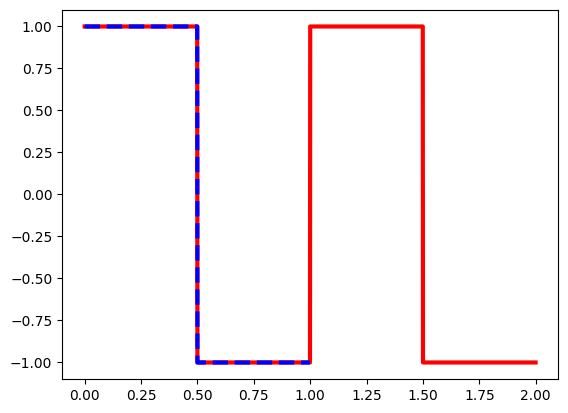

In [ ]:
# defina função quadrada
t2 = T * np.arange(0,2,dt)
print(len(t2))
u2 = square(2*np.pi*t2/T)
print(len(u2))

fig, ax = plt.subplots()
ax.plot(t2, u2, '-', color='r', linewidth=3)
ax.plot(t, u, '--', color='b', linewidth=3)

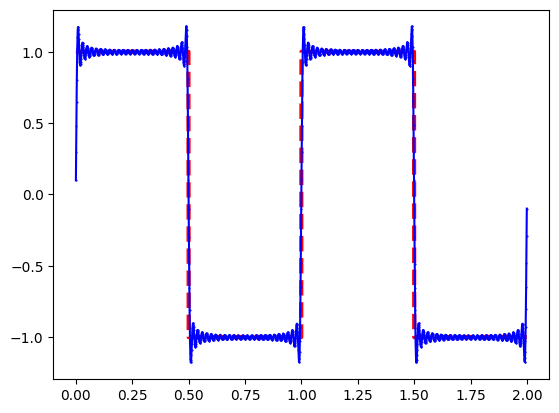

In [ ]:
fig, ax = plt.subplots()
ax.plot(t2, u2, '--', color='r', linewidth=3)

# calcule serie de fourier
nmode = 50
a0 = (2.0/T)*trapezoid(u2,t2)
ap = lambda p:(2.0/T)*trapezoid(u*np.cos(2.*np.pi*p*t/T),t)
bp = lambda p:(2.0/T)*trapezoid(u*np.sin(2.*np.pi*p*t/T),t)

# somatória da série
uFS2 = (a0/2)
uFS2 = uFS2 + sum([ap(k)*np.cos(2.*np.pi*k*t2/T) for k in range(1,nmode+1)])
uFS2 = uFS2 + sum([bp(k)*np.sin(2.*np.pi*k*t2/T) for k in range(1,nmode+1)])

ax.plot(t2,uFS2,'b', marker='.', markersize=1)

In [1]:
nmode = 5
print([k for k in range(1,nmode+1)])
print(a0)
print([ap(k) for k in range(1,nmode+1)])
print([bp(k) for k in range(1,nmode+1)])
#print(sum([ap(k)*np.cos((2.0*np.pi*k*t2)/T) for k in range(1,nmode+1)]))


[1, 2, 3, 4, 5]


NameError: name 'a0' is not defined

# 3. Transformada Rápida de Fourier (FFT)

Exemplo simples da Transformada Rápida de Fourier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-poster')
%matplotlib inline

0.0005
[0.0000e+00 5.0000e-04 1.0000e-03 ... 2.9985e+00 2.9990e+00 2.9995e+00]


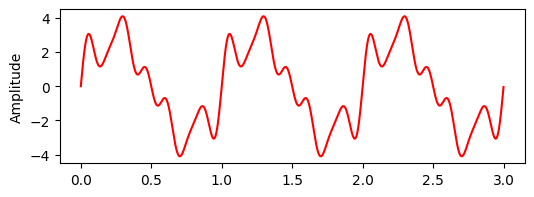

In [ ]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/(sr)
t = np.arange(0,3,ts)
print(ts)
print(t)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4.
x += np.sin(2*np.pi*freq*t)

freq = 5.
x += 0.75* np.sin(2*np.pi*freq*t)

freq = 7.
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (6, 2))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


6000
[   0    1    2 ... 5997 5998 5999]
3.0
[0.00000000e+00 3.33333333e-01 6.66666667e-01 ... 1.99900000e+03
 1.99933333e+03 1.99966667e+03]


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


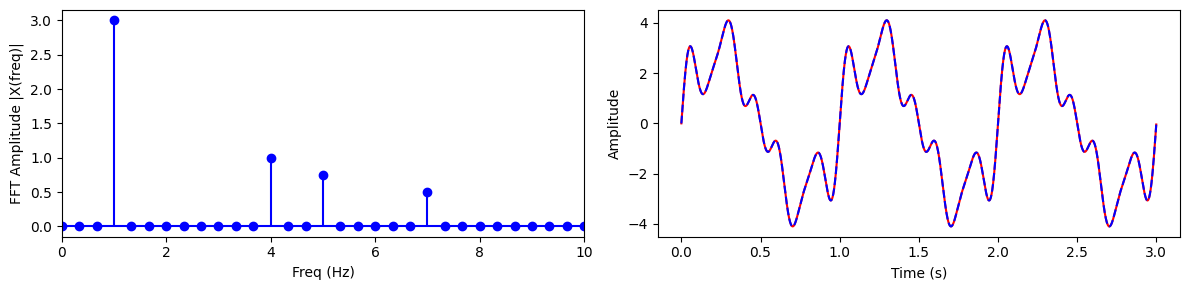

In [ ]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T
print(N)
print(n)
print(T)
print(freq)

plt.figure(figsize = (12, 3))
plt.subplot(121)

plt.stem(freq, np.abs(X)*2/N, 'b', \
         markerfmt="o", basefmt="-b")
#plt.plot(freq, np.abs(X)*2/N)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.plot(t, x, 'b--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## 3.1 Exemplo de FFT

In [ ]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


# Number of sample points
N = len(x)
# sample spacing
dt = (t[1]-t[0])
df = 1/dt
T  = (t[-1]-t[0]+dt)

print(N)
print(T)
print(df)

x_fft = fft(x)[:N//2]
freq = np.arange(N)/T
#print(freq)


peaks_fft, _ = find_peaks(np.abs(x_fft), height=20)
print(peaks_fft)
print(freq[peaks_fft])
#print(x_fft[peaks_fft])

x_peaks_fft   = x_fft[peaks_fft]
freq_peaks_fft = freq[peaks_fft]
print(freq_peaks_fft)

6000
3.0
20000.0
[ 3 12 21]
[1. 4. 7.]
[1. 4. 7.]


In [ ]:
print(N)

6000


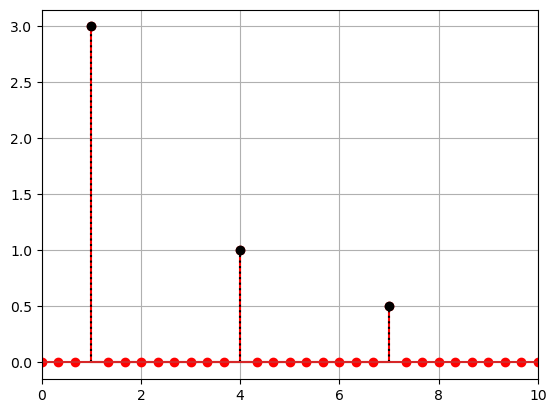

In [ ]:
plt.figure()
plt.stem(freq[0:N//2], 2.0/N * np.abs(x_fft[0:N//2]),'r-')
plt.stem(freq_peaks_fft, 2.0/N * np.abs(x_peaks_fft),'k:')
plt.grid()
plt.xlim(0,10)

plt.show()

## 3.2 FFT de Onda Quadrada

In [ ]:
# defina parametros inicial
A = 1.0
dx = 0.00005
T  = 1.0

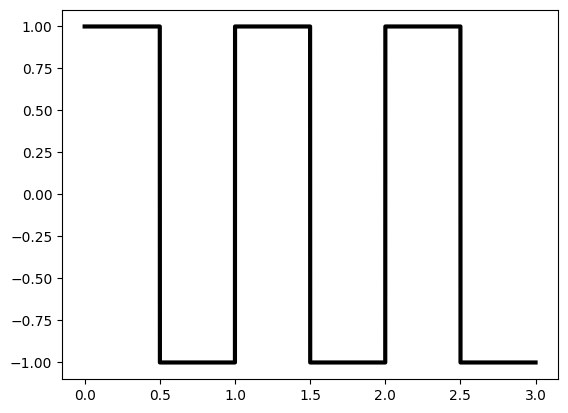

In [ ]:
# defina função quadrada
t = T * np.arange(0,1,dx)
n = len(t)
nhalf = int(np.floor(n/2))

u = np.zeros_like(t)
u[0:nhalf]       = (+1.0)*A
u[nhalf:2*nhalf] = (-1.0)*A

#
t = np.concatenate((t, T+t, 2*T+t), axis=None)
u = np.concatenate((u, u, u),       axis=None)

fig, ax = plt.subplots()
ax.plot(t, u, '-', color='k', linewidth=3)

In [ ]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


# Number of sample points
N = len(u)
# sample spacing
dt = (t[1]-t[0])
df = 1/dt
T  = (t[-1]-t[0]+dt)

print(N)
print(T)
print(df)

u_fft = fft(u)[:N//2]
freq = np.arange(N)/T
#print(freq)


peaks_fft, _ = find_peaks(np.abs(u_fft), height=20)
#print(peaks_fft)
#print(freq[peaks_fft])
#print(x_fft[peaks_fft])

u_peaks_fft    = u_fft[peaks_fft]
freq_peaks_fft = freq[peaks_fft]


60000
3.0
20000.0


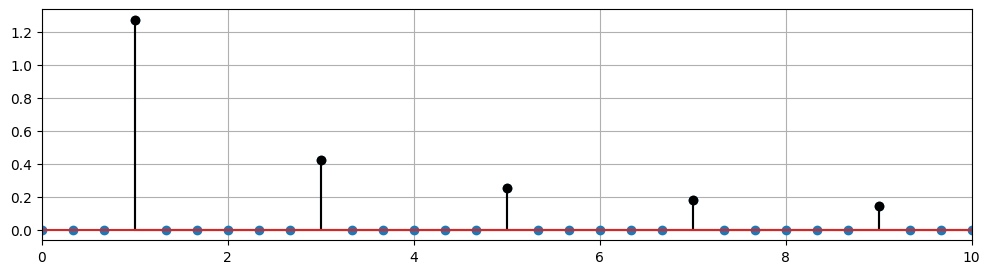

In [ ]:
plt.figure(figsize = (12, 3))
plt.stem(freq[0:N//2], 2.0/N * np.abs(u_fft[0:N//2]))
plt.stem(freq_peaks_fft, 2.0/N * np.abs(u_peaks_fft),'ko')
plt.grid()
plt.xlim(0,10)

plt.show()